In [1]:
%env JAX_PLATFORMS=cpu

env: JAX_PLATFORMS=cpu


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pyod.utils.data import generate_data
from pyod.utils.example import visualize

from iforest import BAD_IForest
from pyod.models.iforest import IForest

X_train, X_test, y_train, y_test = generate_data(
    n_train=1000, n_test=100, contamination=0.1, random_state=0
)
X = X_test.astype(np.float32)
bforest = BAD_IForest().fit(X_train)
iforest = IForest().fit(X_train)

In [3]:
print("IForest fit time:")
%timeit IForest().fit(X_train)
print("IForest predict time:")
%timeit iforest.decision_function(X)

IForest fit time:
73.9 ms ± 123 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
IForest predict time:
1.18 ms ± 22.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [4]:
print("BAD_IForest fit time:")
%timeit BAD_IForest(reprocess_decision_scores=False).fit(X_train)
print("BAD_IForest predict time:")
%timeit bforest.decision_function(X_train)
print("BAD_IForest update time:")
%timeit bforest.update(X_train[0:10], y_train[0:10])

BAD_IForest fit time:
100 ms ± 8.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
BAD_IForest predict time:
7.21 ms ± 30.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
BAD_IForest update time:
4.26 ms ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


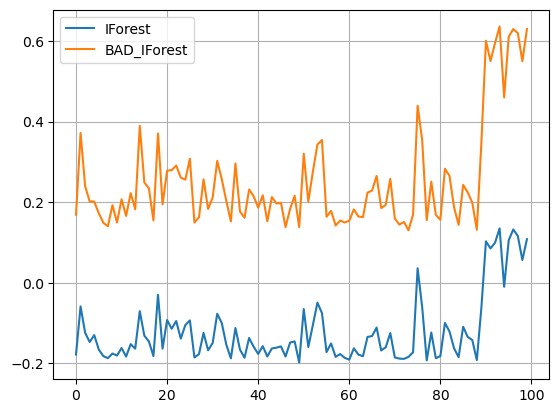

In [5]:
bforest = BAD_IForest().fit(X_train)
iforest = IForest().fit(X_train)
plt.plot(iforest.decision_function(X_test), label='IForest')
plt.plot(bforest.decision_function(X_test), label='BAD_IForest')
plt.legend()
plt.grid()
plt.show()

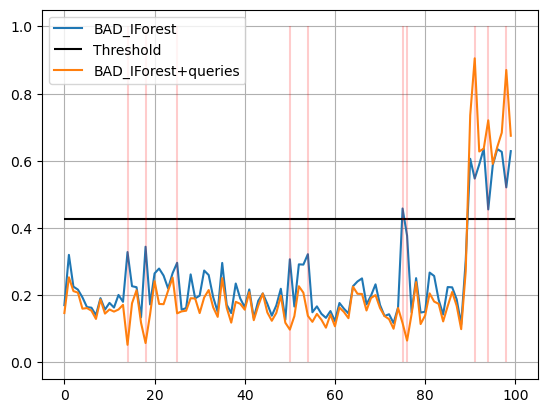

In [7]:
bforest = BAD_IForest().fit(X_train)
plt.plot(bforest.decision_function(X_test), label='BAD_IForest')
plt.hlines(bforest.threshold_, 0, len(X_test), "k", label='Threshold')

for i in range(10):
    scores = bforest.decision_function(X_test)
    i = np.argmin((scores-bforest.threshold_)**2)
    bforest.update(X_test[i:i+1], y_test[i:i+1])
    plt.vlines(i, 0, 1, "r", alpha=0.2)
plt.plot(bforest.decision_function(X_test), label='BAD_IForest+queries')
plt.legend()
plt.grid()
plt.show()